In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
import matplotlib.gridspec as gridspec

In [2]:
# import ITPC spectrum in response to pure tones separated (500Hz/1kHz)
itpc500 = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/figS1/itc_pure_tones_500_by_roi.npz")
itpc1k = np.load("/home/jeremy/Desktop/asymmetric-sampling-master/data/figS1/itc_pure_tones_1k_by_roi.npz")

mean_area1 = itpc500['500_pac_l']
mean_area2 = itpc500['500_pac_r']
mean_area3 = itpc500['500_sac_l']
mean_area4 = itpc500['500_sac_r']
mean_area5 = itpc500['500_aac_l']
mean_area6 = itpc500['500_aac_r']

mean_area11 = itpc1k['1k_pac_l']
mean_area22 = itpc1k['1k_pac_r']
mean_area33 = itpc1k['1k_sac_l']
mean_area44 = itpc1k['1k_sac_r']
mean_area55 = itpc1k['1k_aac_l']
mean_area66 = itpc1k['1k_aac_r']

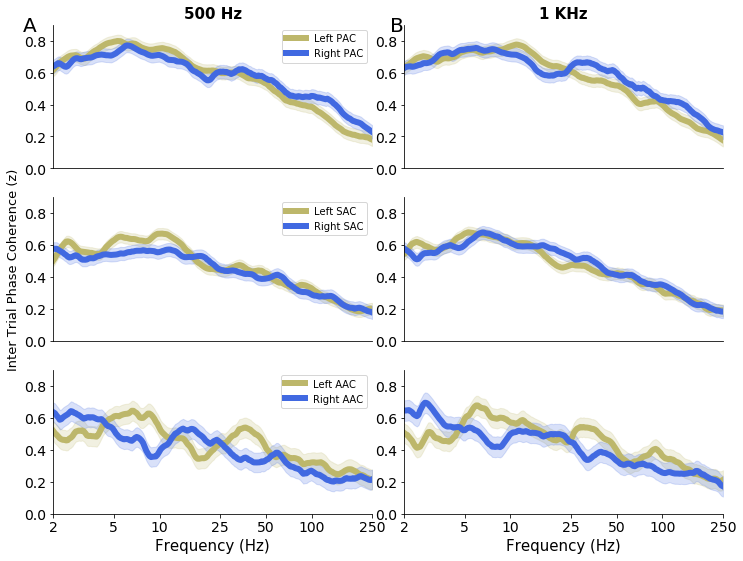

In [3]:
# plotting ITPC spectrums in response to pure tones (500Hz/1khz)
freqs = np.logspace(*np.log10([2, 250]), num=200)
areas = [mean_area1,mean_area2,mean_area11, mean_area22,mean_area3,mean_area4,mean_area33,mean_area44,mean_area5,
mean_area6,mean_area55,mean_area66 ]
colors = ['darkkhaki','royalblue']
idx = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]

titles = ['500 Hz', '1 KHz']
names = ['Left PAC','Right PAC','Left PAC','Right PAC','Left SAC','Right SAC','Left SAC','Right SAC','Left AAC','Right AAC','Left AAC','Right AAC']

widths = [0.5,0.5]
heights = [1,1,1]
figSI = plt.figure(figsize = (12,9))
gs2 = gridspec.GridSpec(3, 2,width_ratios = widths,height_ratios = heights)
gs2.update(wspace=0.1, hspace=0.2)

for i in range(6):
    gss = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = gs2[i],hspace = 0.0)
    ax = figSI.add_subplot(gss[0])
    itc = [areas[idx[i][0]],areas[idx[i][1]]]
    name = [names[idx[i][0]],names[idx[i][1]]]
    for line in range(2): 
    
        ax.plot(freqs,itc[line].mean(axis = 0), linewidth = 6,label = name[line],color = colors[line])
        ax.fill_between(freqs,itc[line].mean(axis = 0)-itc[line].std()/np.sqrt(len(itc[line])),itc[line].mean(axis = 0)+itc[line].std()/np.sqrt(len(itc[line])),
           alpha = 0.2, edgecolor = colors[line], facecolor = colors[line]) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.xscale("log")
    plt.xlim(2,250)
    plt.ylim(0,0.9)
    plt.yticks(fontsize = 14)
    ax.set_yticks(np.round(np.linspace(0, 0.8,5), 2))
    if i in (0,1):
        ax.set_title(titles[i], weight = 'bold',fontsize = 15 )
    if i == 2 :
        ax.set_ylabel('Inter Trial Phase Coherence (z)',fontsize = 13)
    if i in (0,2,4):
        ax.legend()
    if i in (4,5):
        plt.gca().axes.get_xaxis().set_visible(True)
        ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
        ax.xaxis.set_minor_formatter(ticker.NullFormatter())
        ax.xaxis.set_minor_locator(ticker.NullLocator())
        tick_vals = np.array([2,5,10,25,50,100,250]).astype(int)
        ax.set_xticks(tick_vals)
        ax.tick_params(labelsize = 14)
        plt.xticks(fontsize = 14)
        ax.set_xlabel('Frequency (Hz)', fontsize = 15)
figSI.text(0.09,0.87,'A',fontsize=20)
figSI.text(0.515,0.87,'B',fontsize=20);